Questions to answer:

1. Are there any null values or outliers? How will you handle them?
2. What factors are significantly related to the number of web purchases?
3. Which marketing campaign was the most successful?
4. What does the average customer look like?
5. Which products are performing best?
6. Which channels are underperforming?




In [ ]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#reading csv file from google drive (requires mounting)
mar_df = pd.read_csv('//content//drive//MyDrive//Data Analysis Projects//Data Projects//DigMarketing//marketing_data.csv')

**Data Cleaning and Preproccessing**
*   Getting acquainted with the data
*   Looking for outliers, null values, improper values/value types, etc.
*  Manipulating, aggregating, and transforming data to be more useable



In [ ]:
mar_df.head()

NameError: name 'mar_df' is not defined

In [ ]:
#getting dimensions of dataset and datatypes for each column
mar_df.shape
mar_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

2240 Rows, 28 Columns

In [ ]:
#checking unique values of categorical variables
print(mar_df['Marital_Status'].unique())
print(mar_df['Education'].unique())
print(mar_df['Country'].unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
['Spain' 'Canada' 'USA' 'Australia' 'Germany' 'India' 'Saudi Arabia'
 'Mexico']


There are some values unique values returned that should be investigated further.
*   Marital Status - Together, YOLO, Alone, Absurd
*   Education - 2n Cycle, Graduation, Basic



In [ ]:
mar_df.loc[mar_df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
103,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,6,8,0,0,0,0,0,0,0,Canada
104,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,6,8,0,0,0,0,0,1,0,India


Both responses containing YOLO are exactly the same, save for ID and Country, and Response to the final campaign. Because the later response includes a recent interaction, I will remove the earlier entry.

In [ ]:
#removing ID 492
mar_df.drop([103], inplace = True)
mar_df.loc[mar_df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
104,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,6,8,0,0,0,0,0,1,0,India


In [ ]:
mar_df.loc[mar_df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1068,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,6,2,0,0,0,0,0,0,0,Canada
1339,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,7,1,0,0,1,1,0,1,0,Australia


For Absurd, other values seem to be legitimate. Will change Marital_Status to Single. Furthermore, categories such as Widow, alone, or divorced will also be grouped in the Single category

In [ ]:
mar_df.loc[ mar_df["Marital_Status"] == 'Together', 'Marital_Status'] = 'Married'

In [ ]:
mar_df.loc[ mar_df["Marital_Status"] == 'Alone', 'Marital_Status'] = 'Single'
mar_df.loc[ mar_df["Marital_Status"] == 'Divorced', 'Marital_Status'] = 'Single'
mar_df.loc[ mar_df["Marital_Status"] == 'Widow', 'Marital_Status'] = 'Single'
mar_df.loc[ mar_df["Marital_Status"] == 'YOLO', 'Marital_Status'] = 'Single'
mar_df.loc[ mar_df["Marital_Status"] == 'Absurd', 'Marital_Status'] = 'Single'

In [ ]:
mar_df.loc[mar_df['Education'] == '2n Cycle']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,7,6,1,0,0,0,0,1,0,Germany
10,2079,1947,2n Cycle,Married,81044.0,0,0,2013-12-27,0,450,...,10,1,0,0,0,0,0,0,0,USA
18,1473,1960,2n Cycle,Single,47823.0,0,1,2013-07-23,0,53,...,3,8,0,0,0,0,0,0,0,Canada
36,2681,1984,2n Cycle,Married,65370.0,0,0,2013-08-01,1,71,...,13,1,0,0,0,0,0,0,0,Spain
42,1524,1983,2n Cycle,Single,81698.0,0,0,2013-03-01,1,709,...,5,5,0,0,0,1,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10001,1985,2n Cycle,Married,7500.0,1,0,2012-08-01,98,5,...,3,9,0,0,0,0,0,0,0,Spain
2229,2106,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,...,3,8,0,0,0,0,0,0,0,Spain
2230,3363,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,...,3,8,0,0,0,0,0,0,0,Spain
2233,7829,1900,2n Cycle,Single,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,India


2n Cycle equates to a Masters Degree, will make one value

In [ ]:
mar_df.loc[ mar_df["Education"] == '2n Cycle', 'Education'] = 'Master'

Other values for education, such as "Basic" and "Graduation", seem unclear. For the purpose of this analysis and based on outside research on global education terminology, "Basic" refers to those who have completed primary and secondary schools, but have not pursued higher education. "Graduation" refers to those who have completed the equivalent of an undergraduate education in the United States.

In [ ]:
#checking values for yes/no columns contain only 0 and 1
pd.concat([mar_df['AcceptedCmp1'],mar_df['AcceptedCmp2'],mar_df['AcceptedCmp3'],mar_df['AcceptedCmp4'],mar_df['AcceptedCmp5']]).unique()

array([0, 1])

In [3]:
#Check for null values
mar_df.isna().sum()

NameError: name 'mar_df' is not defined

In [ ]:
mar_df['Income '].dtypes
#Income is listed as 'Income '
#renaming columns for ease of use and readability
mar_df = mar_df.rename(columns = {'Income ': 'Income','MntWines':'WineSpend','MntFruits':'FruitSpend','MntFishProducts':'FishSpend','MntMeatProducts':'MeatSpend','MntSweetProducts':'SweetsSpend','MntGoldProds':'GoldSpend','AcceptedCmp1':'Camp1','AcceptedCmp2':'Camp2','AcceptedCmp3':'Camp3','AcceptedCmp4':'Camp4','AcceptedCmp5':'Camp5','Response':'Camp6'})

In [ ]:
mar_df[mar_df['Income'].isna()]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WineSpend,...,NumStorePurchases,NumWebVisitsMonth,Camp3,Camp4,Camp5,Camp1,Camp2,Camp6,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,Germany
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,USA
394,3769,1972,PhD,Married,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,Australia
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,Australia
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,Canada
590,10629,1973,Master,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,Germany
899,10475,1970,Master,Married,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,USA
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,Germany
1096,4345,1964,Master,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,Australia
1185,7187,1969,Master,Married,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,Australia


In [ ]:
#No apparent relationship between NaN values and other variables. Will remove rows.
#dropna returns an df, not alters an existing df
mar_df = mar_df.dropna()
len(mar_df)

2215

In [ ]:
mar_df.duplicated()
#No duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2215, dtype: bool

In [ ]:
#Aggregating variables

#Creating New Column to track total number of campaign acceptances
mar_df['Total Conversions'] = mar_df['Camp1'] + mar_df['Camp2']+ mar_df['Camp3']+ mar_df['Camp4']+ mar_df['Camp5'] + mar_df['Camp6']
#Creating New Column to track total value of purchases
mar_df['Total Value'] = mar_df['WineSpend'] + mar_df['FruitSpend'] + mar_df['FishSpend'] + mar_df['MeatSpend'] + mar_df['SweetsSpend'] + mar_df['GoldSpend']
#Creating New Column to track total number of purchases
mar_df['Total Purchases'] = mar_df['NumCatalogPurchases'] + mar_df['NumStorePurchases'] + mar_df['NumWebPurchases']
mar_df.shape

(2215, 31)

In [ ]:
#Converting customer_dt to datetime
mar_df['Dt_Customer'] = pd.to_datetime(mar_df['Dt_Customer'])
mar_df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
WineSpend                       int64
FruitSpend                      int64
MeatSpend                       int64
FishSpend                       int64
SweetsSpend                     int64
GoldSpend                       int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Camp3                           int64
Camp4                           int64
Camp5                           int64
Camp1                           int64
Camp2                           int64
Camp6                           int64
Complain    

In [ ]:
#creating age column for ease of use
mar_df['Age'] = 2023 - mar_df['Year_Birth']

In [ ]:
#Creating income groups
def create_income_group(row):
  if row['Income'] <25000:
    return 'Less than 25,000'
  elif row['Income'] >= 25000 and row['Income'] <50000:
    return '25,000 to 49,999'
  elif row['Income'] >= 50000 and row['Income'] <74999:
    return '50,000 to 74,999'
  elif row['Income'] >= 75000 and row['Income'] < 99999:
    return '75,000 to 99,999'
  elif row['Income'] >100000 and row['Income'] <= 125000:
    return '100,000 to 125,000'
  else: return 'Greater than 125,000'

mar_df['Income_Group'] = mar_df.apply(create_income_group,axis = 1)
mar_df['Income_Group'] = pd.Categorical(mar_df['Income_Group'], ['Less than 25,000','25,000 to 49,999','50,000 to 74,999','75,000 to 99,999','100,000 to 125,000','Greater than 125,000'])

In [ ]:
mar_df.describe().style.background_gradient(cmap='tab20c')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,WineSpend,FruitSpend,MeatSpend,FishSpend,SweetsSpend,GoldSpend,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Camp3,Camp4,Camp5,Camp1,Camp2,Camp6,Complain,Total Conversions,Total Value,Total Purchases,Age
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5590.654176,1968.818510,52248.973815,0.441986,0.505192,49.033409,305.083973,26.366591,167.048758,37.652822,27.039729,43.966140,2.322348,4.083973,2.671783,5.800903,5.317833,0.073589,0.074041,0.073138,0.064108,0.013544,0.150339,0.009481,0.448758,607.158014,12.556659,54.181490
std,3248.303965,11.987931,25178.630378,0.536935,0.544203,28.938363,337.403901,39.799806,224.320132,54.759778,41.078145,51.827098,1.923309,2.740870,2.927179,3.251516,2.425237,0.261160,0.261896,0.260421,0.245001,0.115614,0.357484,0.096929,0.892591,603.024060,7.206173,11.987931
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,27.000000
25%,2820.500000,1959.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,6.000000,46.000000
50%,5462.000000,1970.000000,51390.000000,0.000000,0.000000,49.000000,174.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,12.000000,53.000000
75%,8423.500000,1977.000000,68557.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1048.000000,18.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2525.000000,32.000000,130.000000


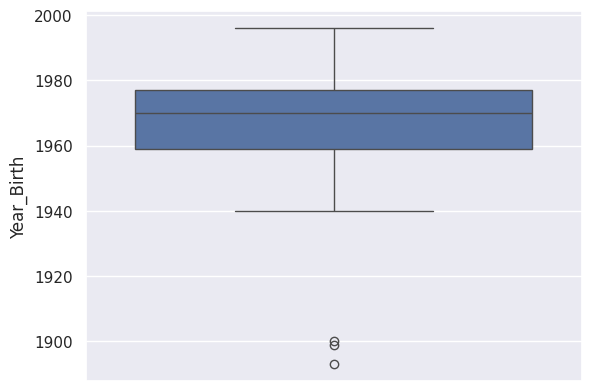

In [ ]:
#investigating age outliers
df_age = mar_df['Year_Birth']
age_box = sns.boxplot(data = df_age)


In [ ]:
#Outliers are not alive currently LOL
#Removing Outliers
mar_df=  mar_df[mar_df['Year_Birth'] >= 1930]

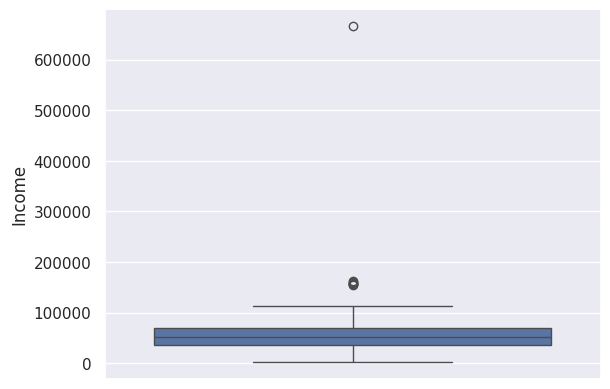

In [ ]:
#investingating income outlier
mar_df.loc[mar_df['Income'] == 666666]
income_box = sns.boxplot(data = mar_df['Income'])

End of Cleaning and Preprocessing

Text(0.5, 0.98, 'Cutomers by Country')

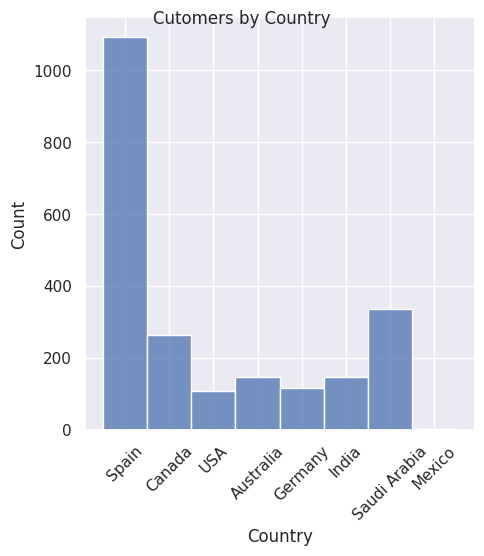

In [ ]:
# Apply the default theme
sns.set_theme()

#Link to SO for titling FacetGrid object: https://stackoverflow.com/questions/64258570/seaborn-title-error-attributeerror-facetgrid-object-has-no-attribute-set-t
plot = sns.displot(mar_df, x="Country")
plt.xticks(rotation=45)
plot.fig.suptitle("Cutomers by Country",fontsize=12, fontdict={"weight": "bold"})
#There is an overwhleming number of customers in the dataset living in Spain, with Saudi Arabia, Canada, India, Austrailia, and Germany following.

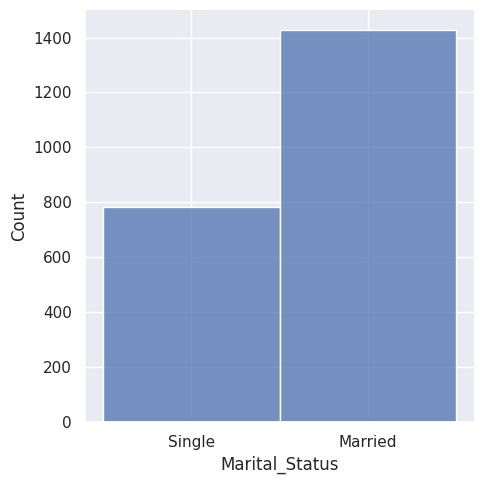

In [ ]:
marital_plot = sns.displot(data = mar_df['Marital_Status'])

In [ ]:
conv = pd.DataFrame()
conv['Total Conversions'] = mar_df['Total Conversions']
conv_palette = {0:'b',1:'r',2:'c',3:'y',4:'g',5:'m'}
#documentation on matplotlib.colors, which translates shorthand in conv_palette to RGB or RGBA form. Necessary for a palette: https://matplotlib.org/3.4.3/_modules/matplotlib/colors.html
conv['palette'] = [conv_palette[k] for k in conv['Total Conversions']]

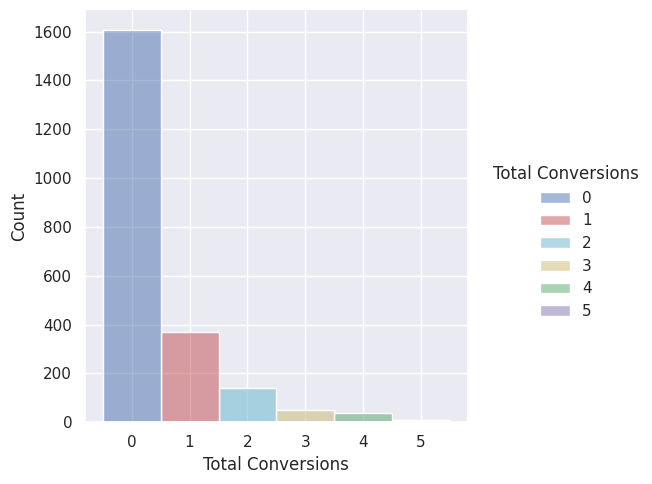

In [ ]:
sns.set_theme()
plot = sns.displot(conv, x="Total Conversions", hue = 'Total Conversions', palette = conv_palette, discrete = True)

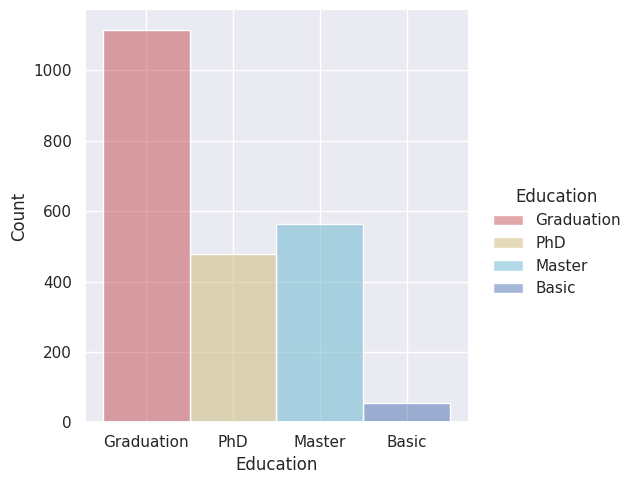

In [ ]:
edu_palette = {'Basic':'b','Graduation':'r','Master':'c','PhD':'y'}
edu_plot = sns.displot(mar_df, x = 'Education', hue = 'Education', palette = edu_palette)

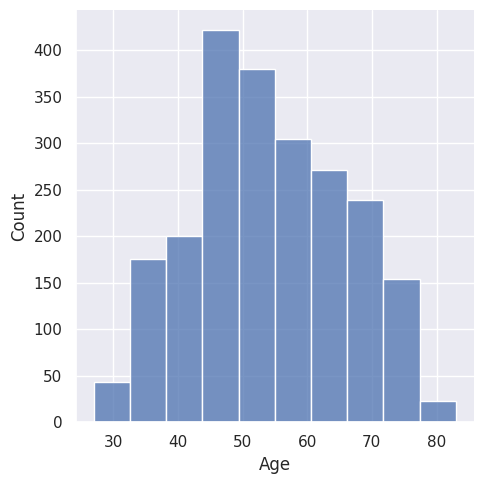

In [ ]:
#age
age_plot = sns.displot(data=mar_df['Age'], bins = 10)

Text(0.5, 0.98, 'Cutomer Income Groups')

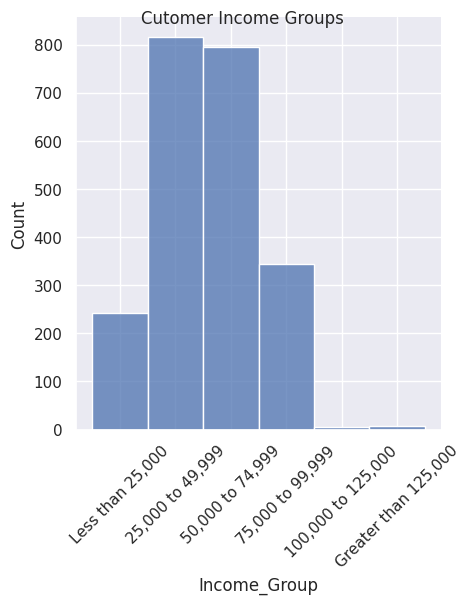

In [ ]:
#Income
income_dist = sns.displot(data = mar_df['Income_Group'])
plt.xticks(rotation=45)
income_dist.fig.suptitle("Cutomer Income Groups",fontsize=12, fontdict={"weight": "bold"})

In [ ]:
print(len(mar_df.loc[mar_df['Income_Group'] == '100,000 to 125,000']))

5


Text(0.5, 1.0, 'Customer Conversion By Campaign')

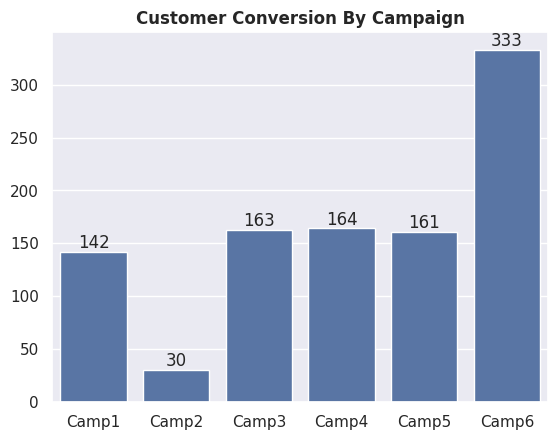

In [ ]:
# creating the dataset
keys = ['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6']
values = [mar_df['Camp1'].sum(), mar_df['Camp2'].sum(),mar_df['Camp3'].sum(),mar_df['Camp4'].sum(),mar_df['Camp5'].sum(),mar_df['Camp6'].sum()]
campaign_dist = sns.barplot(x=keys,y=values)
for i in campaign_dist.containers:
    campaign_dist.bar_label(i,)
campaign_dist.set_title("Customer Conversion By Campaign",fontsize=12, fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Product Spend Distribution by Category')

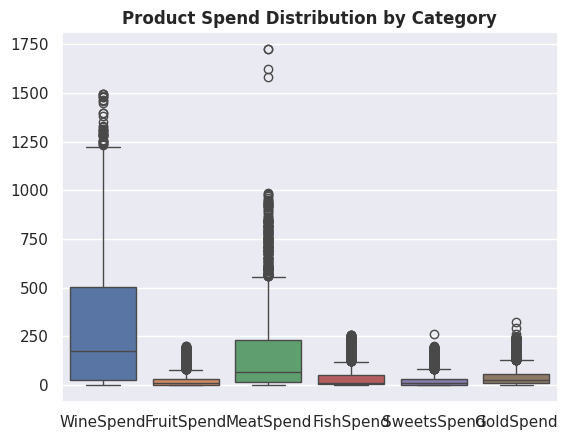

In [ ]:
#boxplot for product category
df_purchase = mar_df[['WineSpend','FruitSpend','MeatSpend','FishSpend','SweetsSpend','GoldSpend']]
goods_box = sns.boxplot(data = df_purchase)
goods_box.set_title("Product Spend Distribution by Category",fontsize=12, fontdict={"weight": "bold"})
#Customers spend most on wine, followed by meat

Text(0.5, 1.0, 'Total Product Spend by Category')

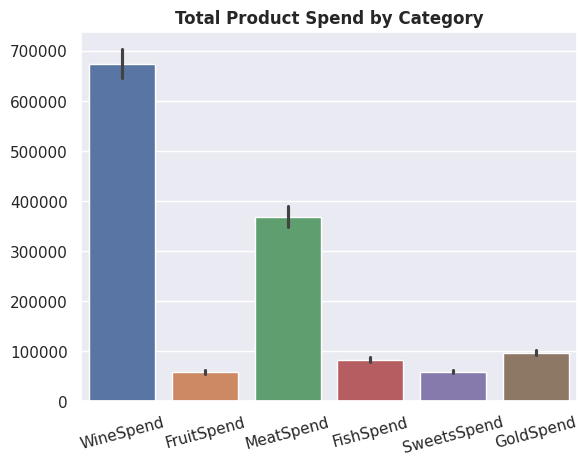

In [ ]:
sum_goods_box = sns.barplot(data=df_purchase, estimator= sum)
plt.xticks(rotation=15)
sum_goods_box.set_title("Total Product Spend by Category",fontsize=12, fontdict={"weight": "bold"})

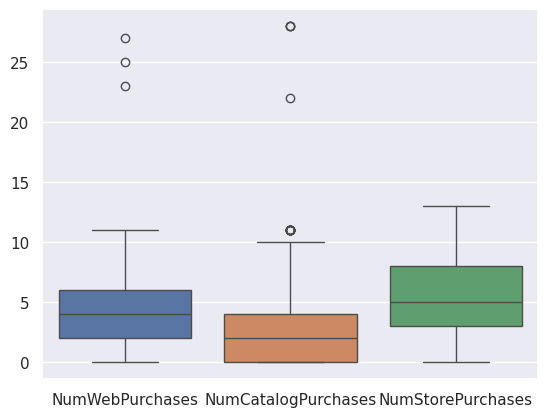

In [ ]:
df_channel = mar_df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
channel_box = sns.boxplot(data= df_channel)

In [ ]:
total = mar_df['Camp1'].sum()
print(total)

142


Based on the analysis done up to this point, the average customer is around 40 to 60 years old, lives in Spain, has an undergraduate degree, has either no kids or one ,and has an income of around 50,000 USD. Campaign 6 has had the greatest sucess, while Campaign 2 pushed significantly less conversions. Customers spend the most money on wine and then meat, and in-person shopping is the most popular channel.

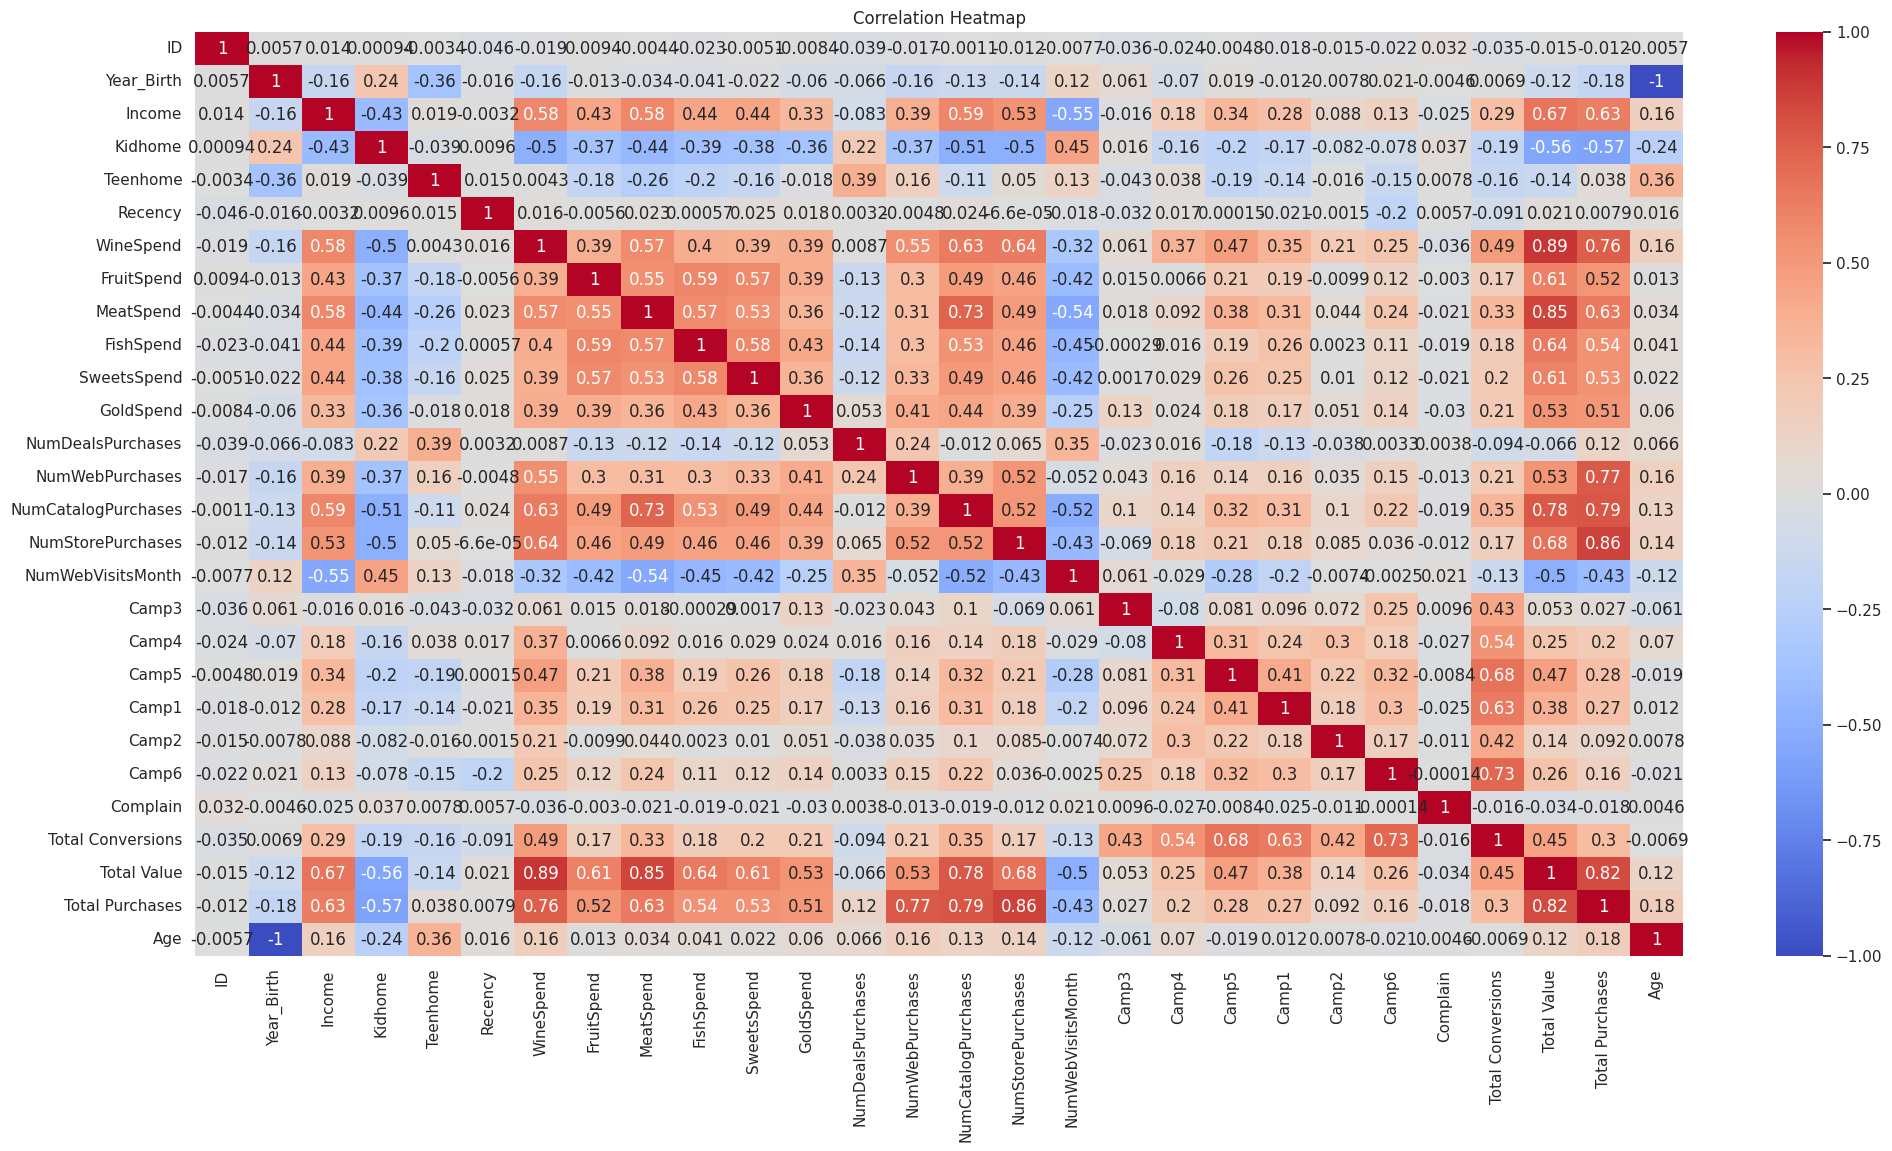

In [ ]:
numeric_columns = mar_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = mar_df[numeric_columns].corr()

plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#People are more likey to make catalog purchases for meat, wine and fish. People are more likely to visit the store when buying wine, with other products around the same
#Web Purchases: while not comprising the majority of purchases, customers are more likely to buy wine and gold (non-groceries). Web purchases should focus on non-perishable goods and more luxury goods

<Axes: xlabel='Country', ylabel='Purchases'>

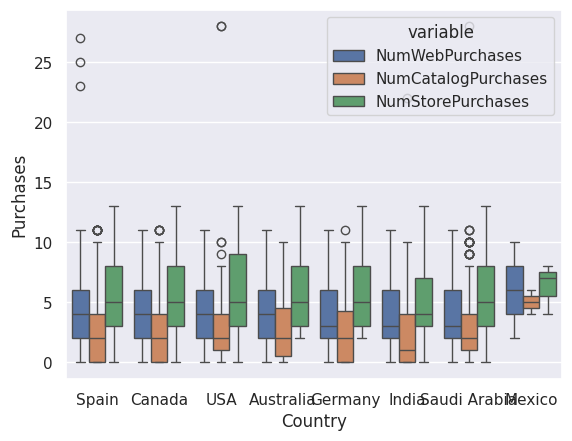

In [ ]:
df_country = mar_df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Country']]
country_melt = pd.melt(df_country, value_name = 'Purchases', value_vars = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'] ,id_vars = ['Country'])
country_melt.columns
sns.boxplot(data=country_melt,x='Country', y='Purchases', hue='variable')
#Geographic Location does not affect the preference of shopping channel
#Spain has a few outliers that make a lot purchases on the Web

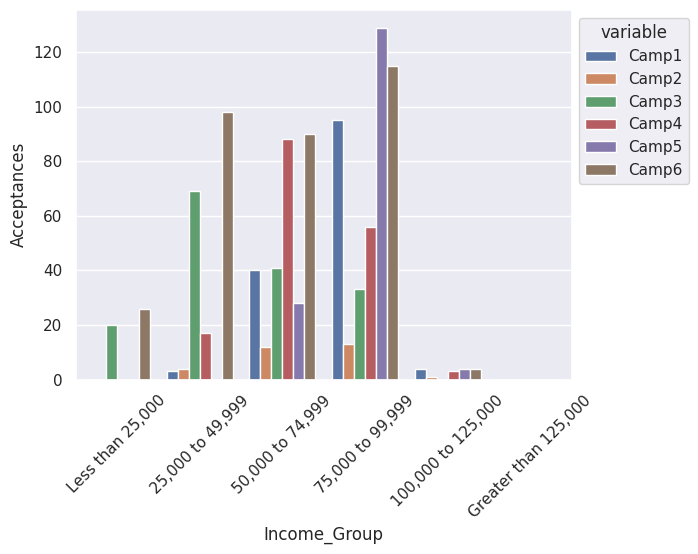

In [ ]:
df_income_camp = mar_df[['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6','Income_Group']]
income_camp_melt = pd.melt(df_income_camp, value_name = 'Acceptances', value_vars = ['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6'] ,id_vars = ['Income_Group'])
#barchart with average response value
#income_camp_bar=sns.barplot(data=income_camp_melt,x='Income_Group', y='Acceptances',hue = 'variable',errorbar = None)
#barchart with sum of responses
income_camp_bar=sns.barplot(data=income_camp_melt,x='Income_Group', y='Acceptances',hue = 'variable', errorbar = None, estimator = sum)
plt.xticks(rotation=45)
sns.move_legend(income_camp_bar, "upper left", bbox_to_anchor=(1, 1))

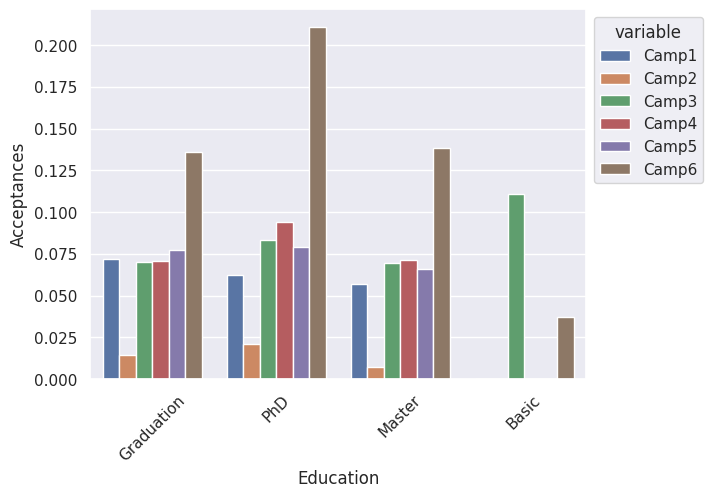

In [ ]:
df_edu_camp = mar_df[['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6','Education']]
edu_camp_melt = pd.melt(df_edu_camp, value_name = 'Acceptances', value_vars = ['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6'] ,id_vars = ['Education'])
#barchart with average response value
edu_camp_bar=sns.barplot(data=edu_camp_melt,x='Education', y='Acceptances',hue = 'variable',errorbar = None)
#barchart with sum of responses
#edu_camp_bar=sns.barplot(data=edu_camp_melt,x='Education', y='Acceptances',hue = 'variable', errorbar = None, estimator = sum)
plt.xticks(rotation=45)
sns.move_legend(edu_camp_bar, "upper left", bbox_to_anchor=(1, 1))

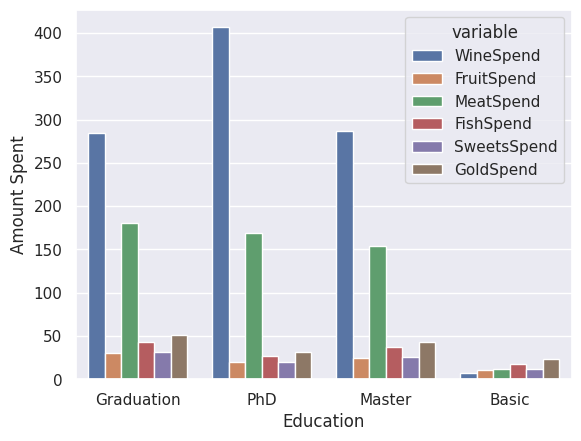

In [ ]:
df_edu_prod = mar_df[['Education','WineSpend','FruitSpend','MeatSpend','FishSpend','SweetsSpend','GoldSpend']]
edu_prod_melt = pd.melt(df_edu_prod, value_name = 'Amount Spent', value_vars = ['WineSpend','FruitSpend','MeatSpend','FishSpend','SweetsSpend','GoldSpend'], id_vars = 'Education')
edu_prod_bar=sns.barplot(data=edu_prod_melt,x='Education', y='Amount Spent',hue = 'variable',errorbar = None)


<Axes: xlabel='Country', ylabel='Total Value'>

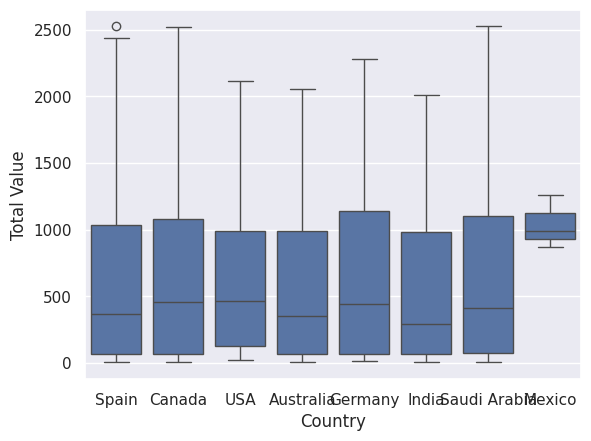

In [ ]:
sns.boxplot(data=mar_df,x='Country', y='Total Value',)
#Based on box plot, USA, Canada, and Germany have higher median total value.
#While Mexico demonstrates a significantly higher median total value, they are based on only 3 customers

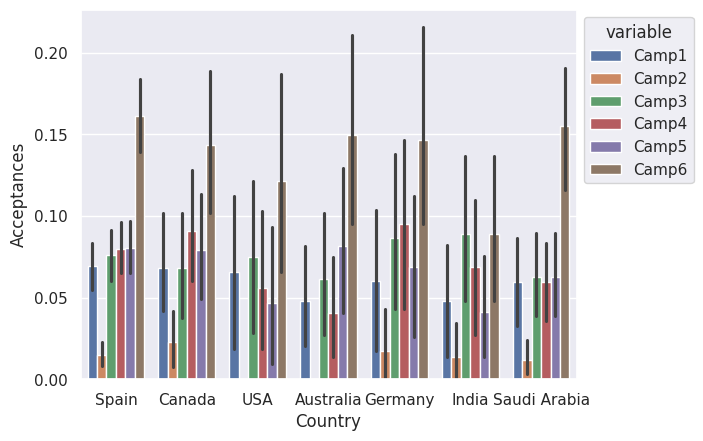

In [ ]:
df_country_camp = mar_df[['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6','Country']]
df_country_camp =  df_country_camp[df_country_camp['Country'] != 'Mexico']
#df_country_camp.plot(x = 'Country', y = 'Camp1', kind = 'bar')

country_camp_melt = pd.melt(df_country_camp, value_name = 'Acceptances', value_vars = ['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6'] ,id_vars = ['Country'])
country_camp_bar=sns.barplot(data=country_camp_melt,x='Country', y='Acceptances',hue = 'variable')
sns.move_legend(country_camp_bar, "upper left", bbox_to_anchor=(1, 1))
#oh nah... leave this alone for now

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less than 25,000'),
  Text(1, 0, '25,000 to 49,999'),
  Text(2, 0, '50,000 to 74,999'),
  Text(3, 0, '75,000 to 99,999'),
  Text(4, 0, '100,000 to 125,000'),
  Text(5, 0, 'Greater than 125,000')])

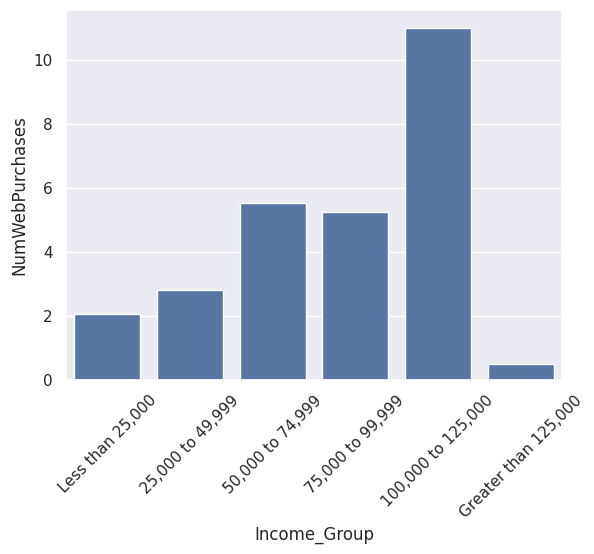

In [ ]:
#num web purchases and income
income_web_bar = sns.barplot(data = mar_df, x = 'Income_Group',y= 'NumWebPurchases', errorbar = None)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less than 25,000'),
  Text(1, 0, '25,000 to 49,999'),
  Text(2, 0, '50,000 to 74,999'),
  Text(3, 0, '75,000 to 99,999'),
  Text(4, 0, '100,000 to 125,000'),
  Text(5, 0, 'Greater than 125,000')])

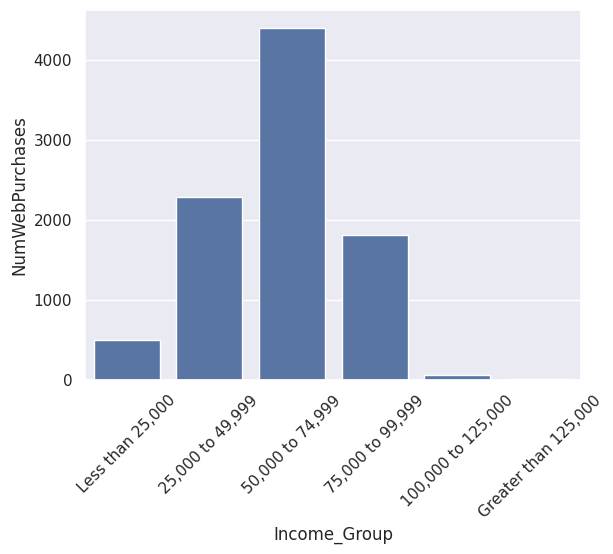

In [ ]:
sum_income_web_bar = sns.barplot(data = mar_df, x = 'Income_Group',y= 'NumWebPurchases', errorbar = None, estimator = sum)
plt.xticks(rotation=45)

In [ ]:
#adding this for ease of creating new dataframes
mar_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'WineSpend', 'FruitSpend',
       'MeatSpend', 'FishSpend', 'SweetsSpend', 'GoldSpend',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Camp3', 'Camp4', 'Camp5',
       'Camp1', 'Camp2', 'Camp6', 'Complain', 'Country', 'Total Conversions',
       'Total Value', 'Total Purchases', 'Age', 'Income_Group'],
      dtype='object')

In [ ]:
pair_df = mar_df[['Income', 'Kidhome',
       'Teenhome','Recency', 'WineSpend', 'FruitSpend',
       'MeatSpend', 'FishSpend', 'SweetsSpend', 'GoldSpend',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Camp3', 'Camp4', 'Camp5',
       'Camp1', 'Camp2', 'Camp6', 'Total Conversions',
       'Total Value', 'Total Purchases', 'Age',]]
pair_plot = sns.pairplot(data = pair_df, diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
mar_df.to_csv('marketing_data_clean.csv')

Tableau Results: last campaign raised proportion of conversions from those with Post-Graduate Degrees. Those with a basic education did not seem to accept campaign offers, but did for Campaign 3. On average, those with incomes from 100,000 to 125,000 made the most web purchases (~11). those with incomes from 25,000 to 75,000 made around 5 web purchases on average.

Recommendations:
On the whole, base future campaigns on Campaign 6. Look into increasing efforts in countries besides Spain with higher average total value. Focus more of the Web Shopping experience on wine and gold, more leisure/luxury items, as opposed to grocery items. Physical stores remain the most popular way of shopping across ages and geographic locations, so attention should be paid to optimizing the in-store shopping experience. Prioritize offers on meat and wine, centering advertisements and promotions more on those two product categories. The business should also focus on advertising to the average consumer: Spanish 40-50 year olds with around 50,000 USD in income.